### Name: Chinedu Onyeka
### DATA 622-MachineLearning Homework2 - DecisionTrees and RandomForests
#### Date: April 29th, 2023

In [1]:
# imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # for support vector machines model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# read the data into memory
url = "https://raw.githubusercontent.com/chinedu2301/data622-machine-learning-and-big-data/main/data/loan_data.csv"
loan_raw_df = pd.read_csv(url)

In [3]:
# view the head
loan_raw_df.head(10)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
5,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,$9613.0
6,6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,$3849.0
7,7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,$5540.0
8,8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,$5532.0
9,9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,$23809.0


### Data Cleaning

In [4]:
# drop the first two columns as those are not needed for the analysis
loan_raw_df = loan_raw_df.drop(["Unnamed: 0", "Loan_ID"], axis = 1)

# remove the "+" sign from the Dependents column and convert it to numeric
loan_raw_df["Dependents"] = loan_raw_df["Dependents"].str.replace("+", "").apply(pd.to_numeric)

# remove the "$" sign from the Total_Income column and convert it to numeric
loan_raw_df["Total_Income"] = loan_raw_df["Total_Income"].str.replace("$", "").apply(pd.to_numeric)

<ipython-input-4-e8ea485aa07b>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_raw_df["Dependents"] = loan_raw_df["Dependents"].str.replace("+", "").apply(pd.to_numeric)
<ipython-input-4-e8ea485aa07b>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_raw_df["Total_Income"] = loan_raw_df["Total_Income"].str.replace("$", "").apply(pd.to_numeric)


In [5]:
loan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         488 non-null    float64
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         482 non-null    float64
 8   Loan_Amount_Term   486 non-null    float64
 9   Credit_History     459 non-null    float64
 10  Property_Area      500 non-null    object 
 11  Loan_Status        500 non-null    object 
 12  Total_Income       500 non-null    float64
dtypes: float64(6), int64(1), object(6)
memory usage: 50.9+ KB


##### Check for Nulls and handle the nulls

In [6]:
# count the sum of nulls in each column
loan_raw_df.isnull().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

<AxesSubplot:>

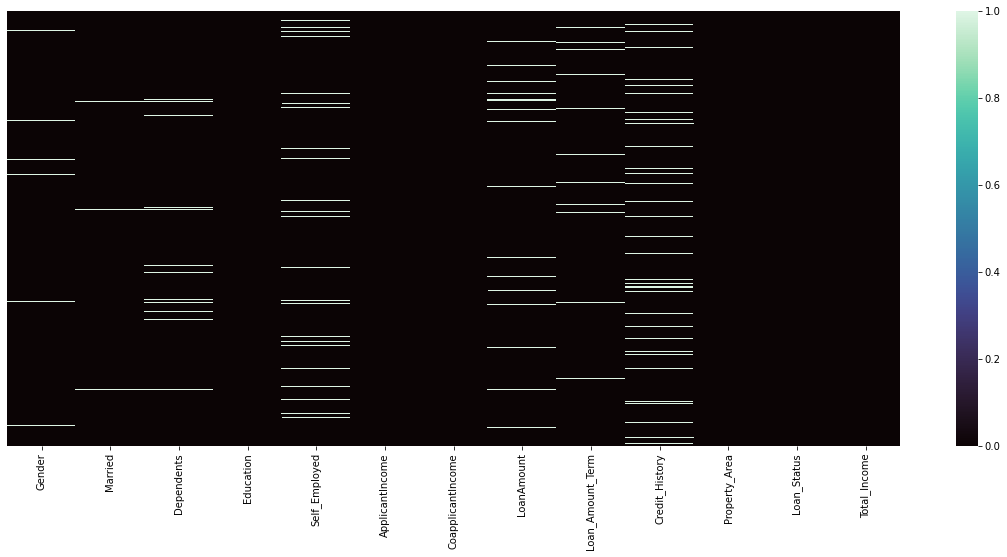

In [7]:
# visualize the nulls
plt.figure(figsize = (20,8))
sns.heatmap(loan_raw_df.isnull(), yticklabels=False, cbar=True, cmap="mako")

There are nulls in numeric and categorical columns. I will fill the nulls in the numeric columns with the mean of the column and the categorical column with the mode.

In [8]:
# get the list of numeric columns
numeric_columns = loan_raw_df._get_numeric_data().columns.tolist()

# get the list of categorical columns
categorical_columns = list(set(loan_raw_df.columns) - set(numeric_columns))

# fill the nulls in numeric columns with the mean
for column in numeric_columns:
    loan_raw_df[column].fillna(loan_raw_df[column].mean(), inplace=True)
    
# fill the nulls in the categorical columns with the mode
for column in categorical_columns:
    loan_raw_df[column].fillna(loan_raw_df[column].mode()[0], inplace=True)

In [9]:
# count the sum of nulls again
loan_raw_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

### Exploratory Data Analysis (EDA)

In [10]:
# check the shape of the data
loan_raw_df.shape

(500, 13)

There are 500 observations and 13 columns in the dataset. Of the 13 columns, there are 12 predictor variables and 1 response variable

Text(0.5, 1.0, 'Count for Loan Status')

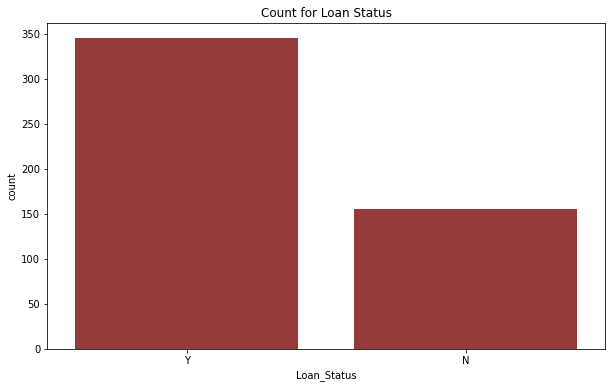

In [11]:
# Barplot for the Loan Status
plt.figure(figsize=(10,6))
sns.countplot(x=loan_raw_df["Loan_Status"], color='brown')
plt.title("Count for Loan Status")

Text(0.5, 1.0, 'Count for Married individuals')

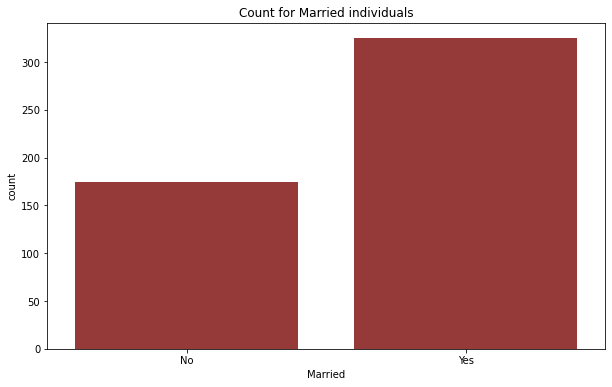

In [12]:
# Barplot for the married vs not-married
plt.figure(figsize=(10,6))
sns.countplot(x=loan_raw_df["Married"], color='brown')
plt.title("Count for Married individuals")

Text(0.5, 1.0, 'Barplot for the level of Education')

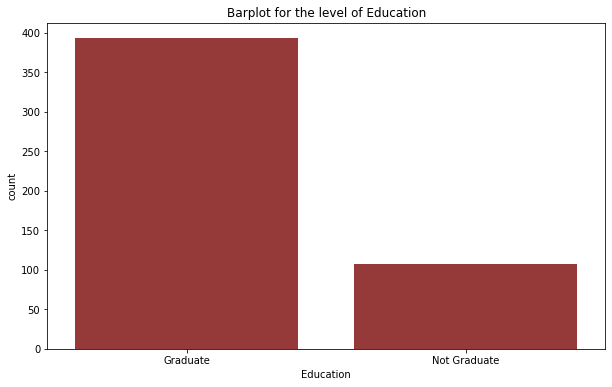

In [13]:
# Barplot for the level of education
plt.figure(figsize=(10,6))
sns.countplot(x=loan_raw_df["Education"], color='brown')
plt.title("Barplot for the level of Education")

Text(0.5, 1.0, 'Barplot for the Gender')

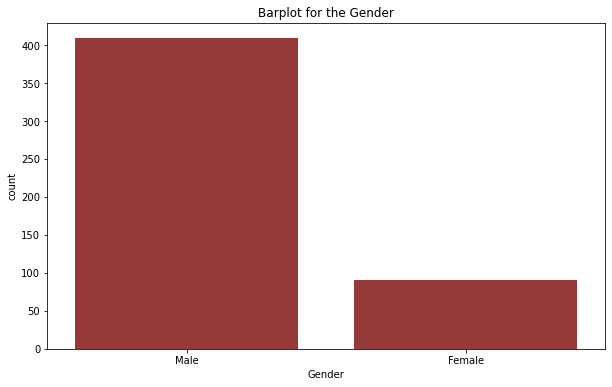

In [14]:
# Barplot for gender
plt.figure(figsize=(10,6))
sns.countplot(x=loan_raw_df["Gender"], color='brown')
plt.title("Barplot for the Gender")

Text(0.5, 0, 'Total Income')

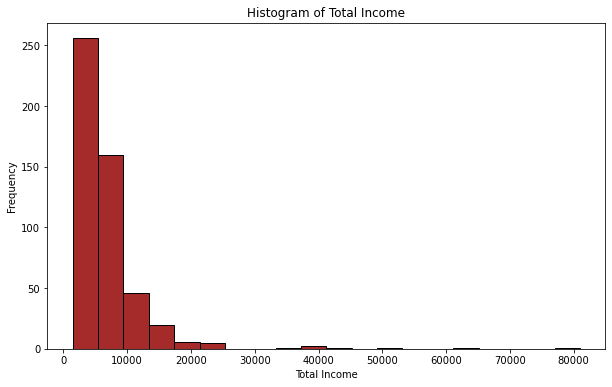

In [15]:
# Histogram for Total Income
plt.figure(figsize=(10,6))
plt.hist(loan_raw_df["Total_Income"], bins=20, color="brown", edgecolor="black")
plt.title("Histogram of Total Income")
plt.ylabel("Frequency")
plt.xlabel("Total Income")

Text(0.5, 1.0, 'Barplot for the Property Area')

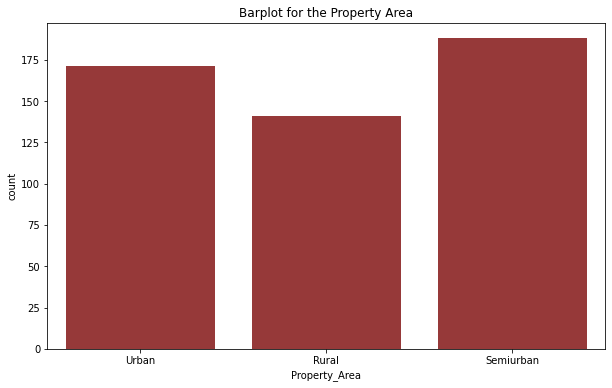

In [16]:
# Barplot for the level of education
plt.figure(figsize=(10,6))
sns.countplot(x=loan_raw_df["Property_Area"], color='brown')
plt.title("Barplot for the Property Area")

<AxesSubplot:>

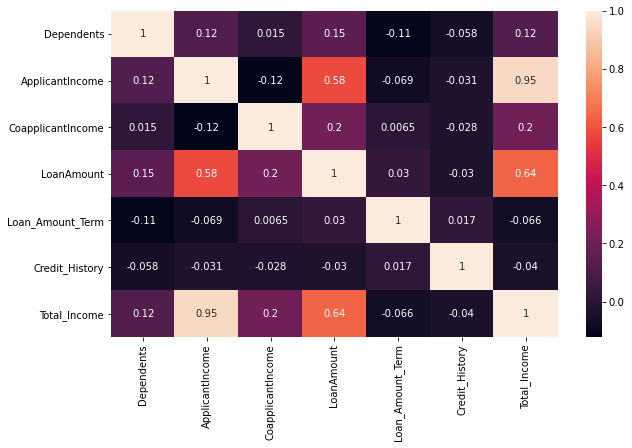

In [17]:
# correlation plot
plt.figure(figsize=(10,6))
sns.heatmap(loan_raw_df.select_dtypes(include=np.number).corr(), annot=True)

### Modeling

##### Data pre-processing

In [18]:
# convert the Loan_Status column to numeric
loan_raw_df["Loan_Status"] = loan_raw_df["Loan_Status"].map({"N": 0, "Y": 1}).astype(int)

# Separate the features from the response variable and get dummies for each categorical variable in the features
y = loan_raw_df["Loan_Status"]
X = loan_raw_df.drop("Loan_Status", axis=1)
X = pd.get_dummies(X)

X.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,144.020747,360.0,1.0,5849.0,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.000000,360.0,1.0,6091.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.000000,360.0,1.0,3000.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.000000,360.0,1.0,4941.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.000000,360.0,1.0,6000.0,0,1,1,0,1,0,1,0,0,0,1


In [19]:
# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=94)

#### Train and fit the model

In [20]:
def model_and_evaluate(model):
    if model in ["decision tree classifier", "DecisionTreeClassifier", "DT", "DecisionTree"]:
        model = DecisionTreeClassifier()
        choice = "DecisionTree Classifier"
    elif model in ["random forest", "RandomForestClassifier", "RF", "rf", "RandomForest", "Random Forest Classifier"]:
        model = RandomForestClassifier()
        choice = "RandomForest Classifier"
    elif model in ["svc", "support vector machines", "Support Vector Classifier", "SVC"]:
        model = SVC(C=1.0, random_state = 94, kernel = 'linear')
        choice = "Support Vector Classifier"
    else:
        print("""The model type is not supported in this function.
                  Enter: DecisionTreeClassifier OR RandomForestClassifier OR SVC""")
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    # evaluate results
    print(choice)
    print()
    accuracy = (accuracy_score(y_test, y_predict) * 100).round(2)
    precision = (precision_score(y_test, y_predict) * 100).round(2)
    recall = (recall_score(y_test, y_predict) * 100).round(2)
    f1 = (f1_score(y_test, y_predict) * 100).round(2)
    auc = (roc_auc_score(y_test, y_predict) * 100).round(2)
    print(f"Accuracy: {accuracy} %")
    print(f"Precision: {precision} %")
    print(f"Recall: {recall} %")
    print(f"F1 Score: {f1} %")
    print(f"AUC: {auc} %")
    print()
    # display the confusion matrix
    print("Confusion Matrix")
    report= confusion_matrix(y_test, y_predict)
    print(report)
    
    return accuracy, precision, recall, f1, auc

In [21]:
# Decision Tree
dt = model_and_evaluate("DecisionTreeClassifier")

DecisionTree Classifier

Accuracy: 62.4 %
Precision: 70.89 %
Recall: 70.0 %
F1 Score: 70.44 %
AUC: 59.44 %

Confusion Matrix
[[22 23]
 [24 56]]


In [22]:
svc = model_and_evaluate("SVC")

Support Vector Classifier

Accuracy: 67.2 %
Precision: 66.39 %
Recall: 98.75 %
F1 Score: 79.4 %
AUC: 54.93 %

Confusion Matrix
[[ 5 40]
 [ 1 79]]


It is often better to standardize the data before running an SVC model since SVC is a distance based model.

In [23]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [24]:
svc_standardized = model_and_evaluate("SVC")

Support Vector Classifier

Accuracy: 76.0 %
Precision: 74.04 %
Recall: 96.25 %
F1 Score: 83.7 %
AUC: 68.12 %

Confusion Matrix
[[18 27]
 [ 3 77]]


In [25]:
rf_standardized = model_and_evaluate("DT")

DecisionTree Classifier

Accuracy: 67.2 %
Precision: 75.32 %
Recall: 72.5 %
F1 Score: 73.89 %
AUC: 65.14 %

Confusion Matrix
[[26 19]
 [22 58]]


In [26]:
print(f"""From the results of the model, we can see that the accuracy of the support vector classifier 
{svc_standardized[0]}, is much greater than the accuracy of the decision tree classifier {dt[0]}, 
also the precision of svc_standardized {svc_standardized[1]} is also greater than that of the decision tree {dt[1]}. 
Furthermore, the AUC of the support vector classifier {svc_standardized[4]} is much better than the AUC of the 
decision tree classifier {dt[4]}""")

From the results of the model, we can see that the accuracy of the support vector classifier 
76.0, is much greater than the accuracy of the decision tree classifier 62.4, 
also the precision of svc_standardized 74.04 is also greater than that of the decision tree 70.89. 
Furthermore, the AUC of the support vector classifier 68.12 is much better than the AUC of the 
decision tree classifier 59.44


Support Vector Machines perform better when standardized whereas the decision tree's performance was about the same even after standardization.